# AdaBoost Algorithm
+ Author: Jingxuan Yang
+ E-mail: yangjx20@mails.tsinghua.edu.cn
+ Page: www.jingxuanyang.com
+ Date: 2021-05-21
+ Project: Pattern Recognition, homework 12
+ Purpose: Implement AdaBoost algorithm on `ada_data.mat` dataset

## Import packages

In [1]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt

## Utils

In [2]:
def adaboost(X, y, X_test, y_test, maxIter):
    '''
    adaboost: carry on adaboost on the data for maxIter loops
    Input 
        X       : n * p matirx, training data
        y       : (n, ) vector, training label
        X_test  : m * p matrix, testing data
        y_test  : (m, ) vector, testing label
        maxIter : number of loops
    Output
        e_train : (maxIter, ) vector, errors on training data
        e_test  : (maxIter, ) vector, errors on testing data
    '''

    w = np.ones(y.shape, dtype='float') / y.shape[0]

    k = np.zeros(maxIter, dtype='int')
    a = np.zeros(maxIter)
    d = np.zeros(maxIter)
    alpha = np.zeros(maxIter)

    e_train = np.zeros(maxIter)
    e_test = np.zeros(maxIter)

    for i in range(maxIter):
        k[i], a[i], d[i] = decision_stump(X, y, w)
        
        e = decision_stump_error(X, y, k[i], a[i], d[i], w)
        print('new decision stump k:%d a:%f, d:%d, e:%f' % (k[i], a[i], d[i],e))
        alpha[i] = 1/2 * np.log((1 - e) / e)
        # alpha[i] = np.log((1 - e) / e)
        w = update_weights(X, y, k[i], a[i], d[i], w, alpha[i])
        
        e_train[i] = adaboost_error(X, y, k, a, d, alpha)
        e_test[i] = adaboost_error(X_test, y_test, k, a, d, alpha)
        print('weak learner error rate: %f\nadaboost error rate: %f\ntest error rate: %f\n' % (e, e_train[i], e_test[i]))

    return e_train, e_test


def decision_stump(X, y, w):
    '''
    decision_stump returns a rule ...
    h(x) = d if x(k) <= a, −d otherwise,
    Input
        X : n * p matrix, each row a sample
        y : (n, ) vector, each row a label
        w : (n, ) vector, each row a weight
    Output
        k : the optimal dimension
        a : the optimal threshold
        d : the optimal d, 1 or -1
    '''

    # total time complexity required to be O(p*n*logn) or less
    ### Your Code Here ###
    p = X.shape[1]
    n = X.shape[0]

    k = -1
    a = -1
    d = 0
    max_prune = 0

    for i in range(p):
        s = np.argsort(X[:,i])
        char = X[:,i][s]
        w_sort = w[s]
        y_sort = y[s]

        integral = 0
        
        for j in range(n):
            integral += y_sort[j] * w_sort[j]
            if abs(integral) > max_prune:
                max_prune = abs(integral)
                k = i
                if j == n-1:
                    a = char[j] + 1
                else:
                    a = (char[j] + char[j+1]) / 2
                d = np.sign(integral)
    ### Your Code Here ###

    return k, a, d


def decision_stump_error(X, y, k, a, d, w):
    '''
    decision_stump_error returns error of the given stump
    Input
        X : n * p matrix, each row a sample
        y : (n, ) vector, each row a label
        k : selected dimension of features
        a : selected threshold for feature-k
        d : 1 or -1
    Output
        e : number of errors of the given stump 
    '''
    p = ((X[:, k] <= a).astype('float') - 0.5) * 2 * d # predicted label
    e = np.sum((p.astype('int') != y) * w)

    return e


def update_weights(X, y, k, a, d, w, alpha):
    '''
    update_weights update the weights with the recent classifier
    
    Input
        X        : n * p matrix, each row a sample
        y        : (n, ) vector, each row a label
        k        : selected dimension of features
        a        : selected threshold for feature-k
        d        : 1 or -1
        w        : (n, ) vector, old weights
        alpha    : weights of the classifiers
    
    Output
        w_update : (n, ) vector, the updated weights
    '''

    ### Your Code Here ###
    p = ((X[:, k] <= a).astype('float') - 0.5) * 2 * d # predicted label
    w_update = w * np.exp(((p.astype(int) != y).astype(float) - 0.5) * 2 * alpha)
    w_update /= w_update.sum()
    ### Your Code Here ###
    
    return w_update


def adaboost_error(X, y, k, a, d, alpha):
    '''
    adaboost_error: returns the final error rate of a whole adaboost
    
    Input
        X     : n * p matrix, each row a sample
        y     : (n, ) vector, each row a label
        k     : (iter, ) vector,  selected dimension of features
        a     : (iter, ) vector, selected threshold for feature-k
        d     : (iter, ) vector, 1 or -1
        alpha : (iter, ) vector, weights of the classifiers
    Output
        e     : error rate  
    '''

    ### Your Code Here ###
    iters = k.shape[0]
    p = np.zeros(y.size)
    for i in range(iters):
        p += alpha[i] * ((X[:, k[i]] <= a[i]).astype('float') - 0.5) * 2 * d[i] # predicted label
    p = ((p >= 0).astype(int) - 0.5) * 2
    e = (p != y).sum() / y.size
    ### Your Code Here ###
    
    return e


## Run AdaBoost

In [3]:
dataFile = 'ada_data.mat'
data = scio.loadmat(dataFile)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train'].ravel()
y_test = data['y_test'].ravel()

### Your Code Here ###
error_train,error_test=adaboost(X_train,y_train,X_test,y_test,300)
### Your Code Here ###

new decision stump k:3 a:0.101121, d:1, e:0.381000
weak learner error rate: 0.381000
adaboost error rate: 0.381000
test error rate: 0.409000

new decision stump k:0 a:0.200388, d:1, e:0.378095
weak learner error rate: 0.378095
adaboost error rate: 0.385000
test error rate: 0.380000

new decision stump k:12 a:0.354067, d:-1, e:0.336975
weak learner error rate: 0.336975
adaboost error rate: 0.317000
test error rate: 0.310000

new decision stump k:20 a:0.206706, d:1, e:0.394229
weak learner error rate: 0.394229
adaboost error rate: 0.312000
test error rate: 0.300000

new decision stump k:18 a:0.227233, d:1, e:0.401915
weak learner error rate: 0.401915
adaboost error rate: 0.282000
test error rate: 0.301000

new decision stump k:22 a:-0.420288, d:-1, e:0.333021
weak learner error rate: 0.333021
adaboost error rate: 0.245000
test error rate: 0.292000

new decision stump k:5 a:0.529665, d:-1, e:0.362794
weak learner error rate: 0.362794
adaboost error rate: 0.231000
test error rate: 0.284000

## Plot figures

Text(0, 0.5, 'error')

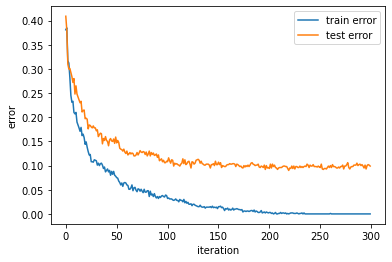

In [4]:
iters = np.arange(300)
plt.plot(iters,error_train,label='train error')
plt.plot(iters,error_test,label='test error')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
# plt.savefig('../doc/figures/error.png', dpi=300)
plt.show()